## DAY 1

### Oil & Gas Data Research, Web Scaping and Analysis

#### Business Problem

Global oil production & price trends - How have crude oil prices correlated with global production volumes over the past decade?


### Datasets I Need 
1. Crude Oil Prices
2. Global Production ( OPEC- Organization Of The Petroleum Exporting Countries AND NON-OPEC - Oil Producing Countries that are not part of the OPEC)

Now Let's Import necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
WTI_Price = pd.read_csv(r"C:\Users\User\Downloads\WTI_Price.csv")
Brent_Price = pd.read_csv(r"C:\Users\User\Downloads\Brent_Price.csv")
Global_Production = pd.read_csv(r"C:\Users\User\Downloads\Global_Production.csv", skiprows=4,
    engine="python")
OPEC_Production = pd.read_csv(r"C:\Users\User\Downloads\OPEC_Production.csv", skiprows=1,
    engine="python")

In [7]:
WTI_Price.head()

,observation_date,DCOILWTICO
0,2015-01-02,52.72
1,2015-01-05,50.05
2,2015-01-06,47.98
3,2015-01-07,48.69
4,2015-01-08,48.80


In [11]:
Brent_Price.head()

,observation_date,DCOILBRENTEU
0,2015-01-02,55.38
1,2015-01-05,51.08
2,2015-01-06,50.12
3,2015-01-07,49.06
4,2015-01-08,49.43


In [13]:
Global_Production.head()

,remove,Unnamed: 1,map,linechart,units,source key,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
0,3d. Total Crude Oil Production,3d. Total Crude Oil Production,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Crude Oil Production,Crude Oil Production,0,0,million barrels per day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,World Total,Total World Crude Oil Production,1,1,million barrels per day,COPR_WORLD,77.15,77.19,76.57,78.29,77.46,71.30,72.25,75.97,76.78,76.57,78.89,79.59
3,OPEC+ total,OPEC+ Crude Oil Production,1,1,million barrels per day,COPR_OPECPLUS,40.09,40.71,39.69,40.41,39.89,36.38,36.05,38.63,37.34,36.03,36.61,37.63
4,United States,United States Crude Oil Production,1,1,million barrels per day,COPRPUS,9.43,8.85,9.36,10.95,12.31,11.34,11.31,12.00,12.94,13.23,13.61,13.59


In [15]:
OPEC_Production.head()

,API,Unnamed: 1,1973,1974,1975,1976,1977,1978,1979,1980,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,crude oil including lease condensate productio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INTL.57-1-OPEC-TBPD.A,OPEC,29067.00000,28889.700000,25451.40000,28695.600000,29211.400000,27715.300000,28889.000000,24947.142077,...,30947.126299,31995.876107,31975.699733,31901.201353,29880.333821,26126.172747,27030.114092,29660.571514,29165.056991,29140.220297
2,INTL.57-1-DZA-TBPD.A,Algeria,1096.90137,1008.860274,982.99726,1075.259563,1151.849315,1231.052055,1224.167123,1105.907104,...,1429.000000,1348.360656,1301.753425,1258.657534,1258.958904,1122.431694,1133.945205,1211.863014,1183.095890,1119.617486
3,INTL.57-1-COG-TBPD.A,Congo-Brazzaville,35.00000,61.000000,37.00000,39.000000,33.000000,33.000000,57.000000,65.000000,...,238.478400,197.996325,244.846390,340.489412,329.705817,283.163453,265.965474,274.561644,261.986301,247.122951
4,INTL.57-1-GNQ-TBPD.A,Equatorial Guinea,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,250.000000,227.000000,184.328767,172.232877,155.767123,147.562842,132.561644,118.383562,88.126429,86.726770


### DATA CLEANING
1. Rename column name for clear identification
2. Convert Date Column to Datetime
3. Extract Year ( Because the production data is **yearly**, and the **WTI/Brent data** is daily.)
4. Convert Price to Numeric
5. Aggregate to Yearly Average Price (Converting prices to Year | Avg Price puts both datasets on the same time scale, so I can merge them correctly and compute a meaningful correlation (instead of comparing one yearly value to hundreds of daily values).

### Data Cleaning for WTL data

In [19]:
WTI_Price.describe()

,DCOILWTICO
count,2760.000000
mean,62.380043
std,17.617044
min,-36.980000
25%,49.407500
50%,61.415000
75%,73.230000
max,123.640000


In [21]:
WTI_Price = WTI_Price.rename(columns={
    "observation_date": "Date",
    "DCOILWTICO": "WTI_Price"
})

In [23]:
WTI_Price["Date"] = pd.to_datetime(WTI_Price["Date"])

In [25]:
WTI_Price["Year"] = WTI_Price["Date"].dt.year

In [27]:
WTI_Price.head()

,Date,WTI_Price,Year
0,2015-01-02,52.72,2015
1,2015-01-05,50.05,2015
2,2015-01-06,47.98,2015
3,2015-01-07,48.69,2015
4,2015-01-08,48.80,2015


In [29]:
WTI_Price["WTI_Price"] = pd.to_numeric(
    WTI_Price["WTI_Price"], errors="coerce"
)

In [31]:
WTI_Yearly = (
    WTI_Price
    .groupby("Year", as_index=False)["WTI_Price"]
    .mean()
    .rename(columns={"WTI_Price": "Avg_WTI_Price"})
)

In [33]:
WTI_Yearly

,Year,Avg_WTI_Price
0,2015,48.656706
1,2016,43.293651
2,2017,50.800320
3,2018,65.227470
4,2019,56.988320
5,2020,39.160437
6,2021,68.135100
7,2022,94.902869
8,2023,77.576532
9,2024,76.632240


### Data Cleaning for Brent Data

In [36]:
Brent_Price.describe()

,DCOILBRENTEU
count,2800.000000
mean,66.421371
std,18.692239
min,9.120000
25%,52.597500
50%,66.130000
75%,77.800000
max,133.180000


In [38]:
Brent_Price = Brent_Price.rename(columns={
    "observation_date": "Date",
    "DCOILBRENTEU": "Brent_Price"
})

In [40]:
Brent_Price["Date"] = pd.to_datetime(Brent_Price["Date"])

Brent_Price["Year"] = Brent_Price["Date"].dt.year

Brent_Price["Brent_Price"] = pd.to_numeric(
    Brent_Price["Brent_Price"], errors="coerce"
)

Brent_Yearly = (
    Brent_Price
    .groupby("Year", as_index=False)["Brent_Price"]
    .mean()
    .rename(columns={"Brent_Price": "Avg_Brent_Price"})
)

Brent_Yearly

,Year,Avg_Brent_Price
0,2015,52.316549
1,2016,43.638000
2,2017,54.124805
3,2018,71.335000
4,2019,64.300623
5,2020,41.957255
6,2021,70.855336
7,2022,100.931310
8,2023,82.493865
9,2024,80.521850


### Data Cleaning For Total Crude oil Production 

1. Drop unwanted columns like "remove", "map", "linechart", "source key"
2. Drop rows 0,1,3,4
3. Then Create a Year and Total World Crude Oil Production column

In [43]:
gp = Global_Production.copy()

gp.columns = gp.columns.str.strip()

cols_to_drop = ["remove", "map", "linechart", "source key"]
gp = gp.drop(columns=cols_to_drop, errors="ignore")

# Drop rows 0,1,3,4
gp = gp.drop(index=[0, 1, 3, 4], errors="ignore").reset_index(drop=True)

# Keep ONLY the row for Total World Crude Oil Production
gp_world = gp[gp["Unnamed: 1"].str.contains("Total World Crude Oil Production", na=False)]

# Identify year columns (2015–2026)
year_cols = [c for c in gp_world.columns if str(c).isdigit()]

Global_Production_clean = gp_world.melt(
    value_vars=year_cols,
    var_name="Year",
    value_name="Total_World_Crude_Oil_Production_mbpd"
)

Global_Production_clean["Year"] = Global_Production_clean["Year"].astype(int)
Global_Production_clean["Total_World_Crude_Oil_Production_mbpd"] = pd.to_numeric(
    Global_Production_clean["Total_World_Crude_Oil_Production_mbpd"], errors="coerce"
)

Global_Production_clean


,Year,Total_World_Crude_Oil_Production_mbpd
0,2015,77.15
1,2016,77.19
2,2017,76.57
3,2018,78.29
4,2019,77.46
5,2020,71.30
6,2021,72.25
7,2022,75.97
8,2023,76.78
9,2024,76.57


### Data Cleaning For OPEC Production data

1. Drop API
2. Drop year columns 1973–2014
3. Drop row 0
4. Exclude the OPEC total row (keep only member countries)
5. End with a tidy table: Year | OPEC | oil_Production

In [46]:
op = OPEC_Production.copy()
op.columns = op.columns.astype(str).str.strip()

# Drop API column
op = op.drop(columns=["API"], errors="ignore")

# Drop year columns 1973–2014 
years_to_drop = [str(y) for y in range(1973, 2015)]
op = op.drop(columns=[c for c in years_to_drop if c in op.columns], errors="ignore")

# Remove row 0 (metadata row)
op = op.drop(index=0, errors="ignore").reset_index(drop=True)

# Rename country column for clarity (it appears as "Unnamed: 1")
op = op.rename(columns={"Unnamed: 1": "OPEC"})

# Remove the total OPEC row (keep only member countries)
op = op[op["OPEC"].str.strip().str.upper() != "OPEC"]

# Identify remaining year columns (2015–2026)
year_cols = [c for c in op.columns if c.isdigit()]

OPEC_Production_clean = op.melt(
    id_vars=["OPEC"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Oil_Production_mbpd_OPEC"
)


OPEC_Production_clean["Year"] = OPEC_Production_clean["Year"].astype(int)
OPEC_Production_clean["Oil_Production_mbpd_OPEC"] = pd.to_numeric(OPEC_Production_clean["Oil_Production_mbpd_OPEC"], errors="coerce")

OPEC_Production_clean


,OPEC,Year,Oil_Production_mbpd_OPEC
0,Algeria,2015,1429.000000
1,Congo-Brazzaville,2015,238.478400
2,Equatorial Guinea,2015,250.000000
3,Gabon,2015,213.328767
4,Iran,2015,3293.189041
...,...,...,...
115,Libya,2024,1163.273224
116,Nigeria,2024,1488.869572
117,Saudi Arabia,2024,9232.154456
118,United Arab Emirates,2024,3744.945355


### Let's Check for missing Values

In [49]:
WTI_Yearly.isnull().sum()

Year             0
Avg_WTI_Price    0
dtype: int64

In [51]:
Brent_Yearly.isnull().sum()

Year               0
Avg_Brent_Price    0
dtype: int64

In [53]:
Global_Production_clean.isnull().sum()

Year                                     0
Total_World_Crude_Oil_Production_mbpd    0
dtype: int64

In [55]:
OPEC_Production_clean.isnull().sum()

OPEC                        0
Year                        0
Oil_Production_mbpd_OPEC    0
dtype: int64

Now, We are donewith the data cleaning.

But I noticed that the OPEC Production has data of 2015 - 2024

And others have up to 2026

My Initial Analysis was for a decade that is 2015 - 2025

So, Now I have to filter all datasets to 2015–2024 

In [58]:
START_YEAR, END_YEAR = 2015, 2024

WTI_Yearly = WTI_Yearly.query("Year >= @START_YEAR and Year <= @END_YEAR")
Brent_Yearly = Brent_Yearly.query("Year >= @START_YEAR and Year <= @END_YEAR")
Global_Production_clean = Global_Production_clean.query("Year >= @START_YEAR and Year <= @END_YEAR")
OPEC_Production_clean = OPEC_Production_clean.query("Year >= @START_YEAR and Year <= @END_YEAR")

### Merge dataset for analysis
But let's make the OPEC production data a Yearly data

In [61]:
OPEC_total_yearly = (OPEC_Production_clean.groupby("Year", as_index=False)["Oil_Production_mbpd_OPEC"].sum()
                     .rename(columns={"Oil_Production_mbpd_OPEC":"OPEC_Production_mbpd"}))

In [63]:
OPEC_total_yearly

,Year,OPEC_Production_mbpd
0,2015,30947.126299
1,2016,31995.876107
2,2017,31975.699733
3,2018,31901.201353
4,2019,29880.333821
5,2020,26126.172747
6,2021,27030.114092
7,2022,29660.571514
8,2023,29165.056991
9,2024,29140.220297


In [65]:
Crude_Ol_Production_and_Prices = (Global_Production_clean
          .merge(OPEC_total_yearly, on="Year", how="inner")
          .merge(WTI_Yearly, on="Year", how="inner")
          .merge(Brent_Yearly, on="Year", how="inner")
         )

Crude_Ol_Production_and_Prices.head()

,Year,Total_World_Crude_Oil_Production_mbpd,OPEC_Production_mbpd,Avg_WTI_Price,Avg_Brent_Price
0,2015,77.15,30947.126299,48.656706,52.316549
1,2016,77.19,31995.876107,43.293651,43.638000
2,2017,76.57,31975.699733,50.800320,54.124805
3,2018,78.29,31901.201353,65.227470,71.335000
4,2019,77.46,29880.333821,56.988320,64.300623


Good, but notice as OPEC production is higher than Total world production and that is not realistic

I got to find out that it was in Thousand barrel per day not Million Barrel per day

So let's Convert it to mb/p

In [68]:
Crude_Ol_Production_and_Prices["OPEC_Production_mbpd"] = Crude_Ol_Production_and_Prices["OPEC_Production_mbpd"] / 1000

Crude_Ol_Production_and_Prices

,Year,Total_World_Crude_Oil_Production_mbpd,OPEC_Production_mbpd,Avg_WTI_Price,Avg_Brent_Price
0,2015,77.15,30.947126,48.656706,52.316549
1,2016,77.19,31.995876,43.293651,43.638000
2,2017,76.57,31.975700,50.800320,54.124805
3,2018,78.29,31.901201,65.227470,71.335000
4,2019,77.46,29.880334,56.988320,64.300623
5,2020,71.30,26.126173,39.160437,41.957255
6,2021,72.25,27.030114,68.135100,70.855336
7,2022,75.97,29.660572,94.902869,100.931310
8,2023,76.78,29.165057,77.576532,82.493865
9,2024,76.57,29.140220,76.632240,80.521850


In [70]:
Crude_Ol_Production_and_Prices["Non_OPEC_Production_mbpd"] = (
    Crude_Ol_Production_and_Prices["Total_World_Crude_Oil_Production_mbpd"] - Crude_Ol_Production_and_Prices["OPEC_Production_mbpd"]
)

Crude_Ol_Production_and_Prices


,Year,Total_World_Crude_Oil_Production_mbpd,OPEC_Production_mbpd,Avg_WTI_Price,Avg_Brent_Price,Non_OPEC_Production_mbpd
0,2015,77.15,30.947126,48.656706,52.316549,46.202874
1,2016,77.19,31.995876,43.293651,43.638000,45.194124
2,2017,76.57,31.975700,50.800320,54.124805,44.594300
3,2018,78.29,31.901201,65.227470,71.335000,46.388799
4,2019,77.46,29.880334,56.988320,64.300623,47.579666
5,2020,71.30,26.126173,39.160437,41.957255,45.173827
6,2021,72.25,27.030114,68.135100,70.855336,45.219886
7,2022,75.97,29.660572,94.902869,100.931310,46.309428
8,2023,76.78,29.165057,77.576532,82.493865,47.614943
9,2024,76.57,29.140220,76.632240,80.521850,47.429780


In [72]:
Crude_Ol_Production_and_Prices.to_csv("Crude_Ol_Production_and_Prices.csv", index=False)

### DAY 2

## To Answer Business Question

- How have crude oil prices correlated with global production volumes over the past decade?

We’ll break this into sub-questions: 
- Is higher global production associated with lower prices?
- Does OPEC vs Non-OPEC production behave differently?
- Do price–production relationships change during shocks (COVID, Russia-Ukraine, OPEC cuts)?

Answer Q1: “Is higher global production associated with lower prices?”

Correlation (global vs prices)

In [77]:
corr_global_wti  = Crude_Ol_Production_and_Prices["Total_World_Crude_Oil_Production_mbpd"].corr(Crude_Ol_Production_and_Prices["Avg_WTI_Price"])
corr_global_brent = Crude_Ol_Production_and_Prices["Total_World_Crude_Oil_Production_mbpd"].corr(Crude_Ol_Production_and_Prices["Avg_Brent_Price"])
corr_global_wti, corr_global_brent


(0.1648652697170697, 0.1950721498760255)

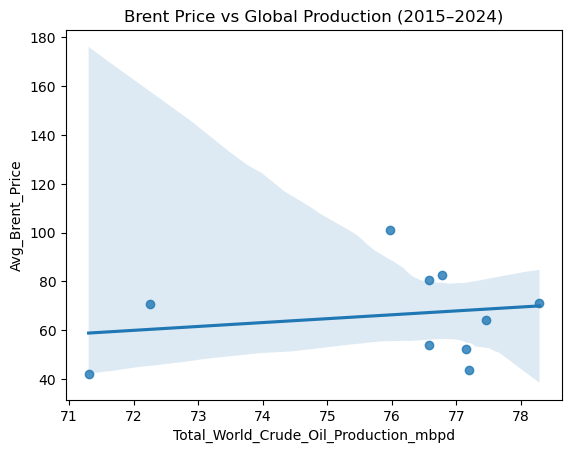

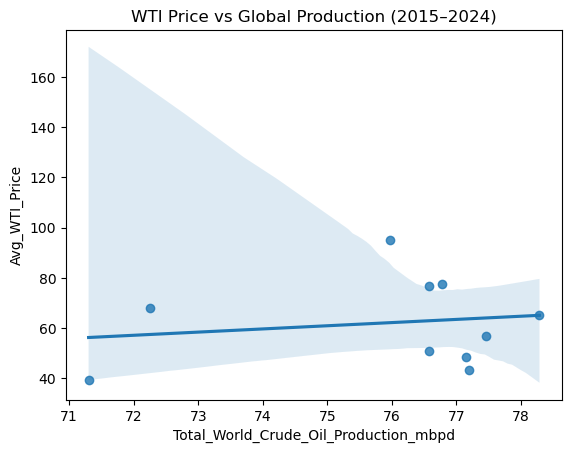

In [79]:
sns.regplot(data= Crude_Ol_Production_and_Prices, x="Total_World_Crude_Oil_Production_mbpd", y="Avg_Brent_Price")
plt.title("Brent Price vs Global Production (2015–2024)")
plt.show()

sns.regplot(data= Crude_Ol_Production_and_Prices, x="Total_World_Crude_Oil_Production_mbpd", y="Avg_WTI_Price")
plt.title("WTI Price vs Global Production (2015–2024)")
plt.show()


Over **2015–2024**, global crude oil production shows a **very weak positive correlation** with prices **(WTI: r≈0.16, Brent: r≈0.20)**. 

This suggests that production volumes alone do not explain price movements; demand shifts and supply disruptions likely played a larger role.

**Why it might be weak/positive (what’s driving this)**

- COVID (2020): both production and prices fell together (demand shock) → pushes correlation positive.

- 2022: prices rose due to geopolitics even while production recovered → weakens any simple supply-driven negative link.

- OPEC policy cuts can also break a simple “more supply → lower price” pattern.

Answer Q2: “Does OPEC vs Non-OPEC behave differently?”

In [82]:
corr_opec_brent = Crude_Ol_Production_and_Prices["OPEC_Production_mbpd"].corr(Crude_Ol_Production_and_Prices["Avg_Brent_Price"])
corr_non_opec_brent = Crude_Ol_Production_and_Prices["Non_OPEC_Production_mbpd"].corr(Crude_Ol_Production_and_Prices["Avg_Brent_Price"])

corr_opec_wti = Crude_Ol_Production_and_Prices["OPEC_Production_mbpd"].corr(Crude_Ol_Production_and_Prices["Avg_WTI_Price"])
corr_non_opec_wti = Crude_Ol_Production_and_Prices["Non_OPEC_Production_mbpd"].corr(Crude_Ol_Production_and_Prices["Avg_WTI_Price"])

corr_opec_brent, corr_non_opec_brent, corr_opec_wti, corr_non_opec_wti


(-0.08604228190677808,
 0.5623095371652642,
 -0.0978677872854994,
 0.5214299681006702)

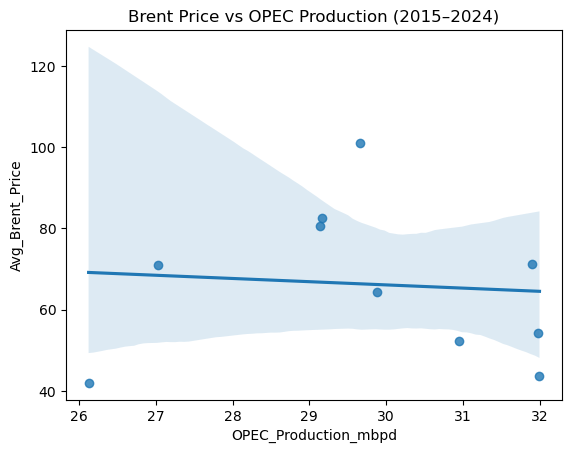

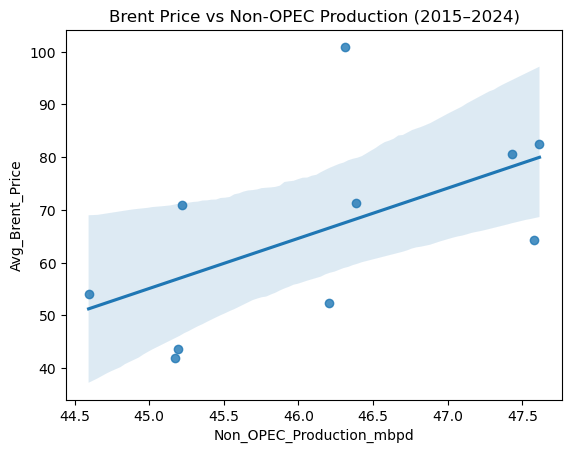

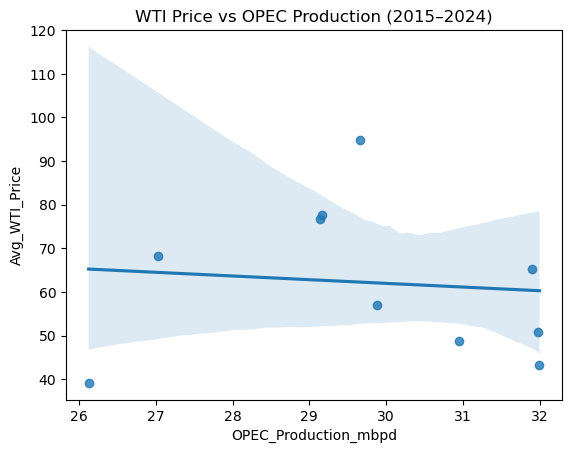

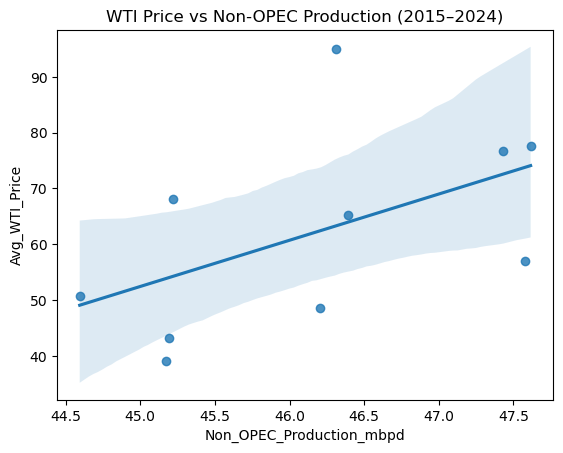

In [83]:
sns.regplot(Crude_Ol_Production_and_Prices, x="OPEC_Production_mbpd", y="Avg_Brent_Price")
plt.title("Brent Price vs OPEC Production (2015–2024)")
plt.show()

sns.regplot(data=Crude_Ol_Production_and_Prices, x="Non_OPEC_Production_mbpd", y="Avg_Brent_Price")
plt.title("Brent Price vs Non-OPEC Production (2015–2024)")
plt.show()

sns.regplot(Crude_Ol_Production_and_Prices, x="OPEC_Production_mbpd", y="Avg_WTI_Price")
plt.title("WTI Price vs OPEC Production (2015–2024)")
plt.show()

sns.regplot(data=Crude_Ol_Production_and_Prices, x="Non_OPEC_Production_mbpd", y="Avg_WTI_Price")
plt.title("WTI Price vs Non-OPEC Production (2015–2024)")
plt.show()


Over **2015–2024, OPEC production** has a **near-zero correlation with crude prices (Brent r≈-0.09; WTI r≈-0.10)**, while **Non-OPEC production** shows a **moderate positive correlation (Brent r≈0.56; WTI r≈0.52)**. 

This suggests **Non-OPEC output** is more price-responsive, whereas OPEC output reflects strategic supply management rather than tracking prices directly.”

Correlation ≠ causation. The positive Non-OPEC correlation could also reflect demand cycles (both production and prices rise in expansions).

Answer Q3: “Do relationships change during shocks?”

In [87]:
# Create period labels (pre-COVID, COVID, post-COVID/geopolitical) and compute correlation per period.

def label_period(y):
    if y <= 2019:
        return "Pre-COVID (2015–2019)"
    elif y <= 2021:
        return "COVID shock (2020–2021)"
    else:
        return "Post-COVID/Geo (2022–2024)"

Crude_Ol_Production_and_Prices["Period"] = Crude_Ol_Production_and_Prices["Year"].apply(label_period)



In [89]:
by_period = (Crude_Ol_Production_and_Prices.groupby("Period")
             .apply(lambda g: pd.Series({
                 "Corr_Global_Brent": g["Total_World_Crude_Oil_Production_mbpd"].corr(g["Avg_Brent_Price"]),
                 "Corr_OPEC_Brent": g["OPEC_Production_mbpd"].corr(g["Avg_Brent_Price"]),
                 "Corr_NonOPEC_Brent": g["Non_OPEC_Production_mbpd"].corr(g["Avg_Brent_Price"]),
             }))
             .reset_index())

by_period


C:\Users\User\AppData\Local\Temp\ipykernel_20792\2370351447.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,Period,Corr_Global_Brent,Corr_OPEC_Brent,Corr_NonOPEC_Brent
0,COVID shock (2020–2021),1.000000,1.000000,1.000000
1,Post-COVID/Geo (2022–2024),-0.942701,0.998971,-0.976084
2,Pre-COVID (2015–2019),0.724255,-0.283615,0.621498


In [90]:
by_period = (Crude_Ol_Production_and_Prices.groupby("Period")
             .apply(lambda g: pd.Series({
                 "Corr_Global_WTI": g["Total_World_Crude_Oil_Production_mbpd"].corr(g["Avg_WTI_Price"]),
                 "Corr_OPEC_WTI": g["OPEC_Production_mbpd"].corr(g["Avg_WTI_Price"]),
                 "Corr_NonOPEC_WTI": g["Non_OPEC_Production_mbpd"].corr(g["Avg_WTI_Price"]),
             }))
             .reset_index())

by_period

C:\Users\User\AppData\Local\Temp\ipykernel_20792\2959376930.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,Period,Corr_Global_WTI,Corr_OPEC_WTI,Corr_NonOPEC_WTI
0,COVID shock (2020–2021),1.000000,1.000000,1.000000
1,Post-COVID/Geo (2022–2024),-0.955815,0.999994,-0.984313
2,Pre-COVID (2015–2019),0.762369,-0.160857,0.543508


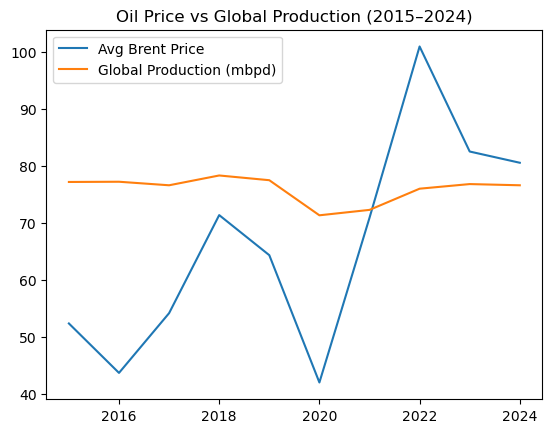

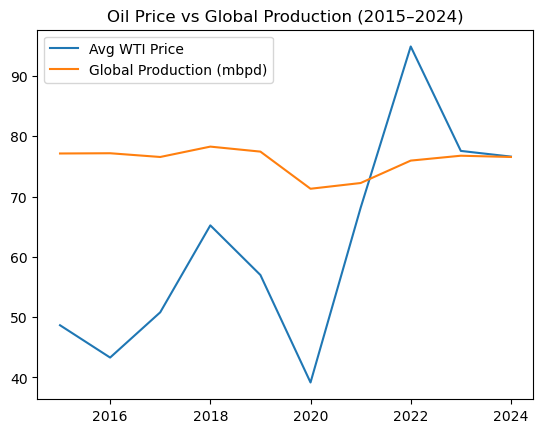

In [91]:
plt.plot(Crude_Ol_Production_and_Prices["Year"], Crude_Ol_Production_and_Prices["Avg_Brent_Price"], label="Avg Brent Price")
plt.plot(Crude_Ol_Production_and_Prices["Year"], Crude_Ol_Production_and_Prices["Total_World_Crude_Oil_Production_mbpd"], label="Global Production (mbpd)")
plt.legend()
plt.title("Oil Price vs Global Production (2015–2024)")
plt.show()

plt.plot(Crude_Ol_Production_and_Prices["Year"], Crude_Ol_Production_and_Prices["Avg_WTI_Price"], label="Avg WTI Price")
plt.plot(Crude_Ol_Production_and_Prices["Year"], Crude_Ol_Production_and_Prices["Total_World_Crude_Oil_Production_mbpd"], label="Global Production (mbpd)")
plt.legend()
plt.title("Oil Price vs Global Production (2015–2024)")
plt.show()

**Before COVID**, production and prices tended to rise together (likely demand-driven), while OPEC production moved weakly opposite to prices, consistent with supply management.

**Shock periods:** the relationship appears to flip and become more volatile

**Post-2022:** Global and Non-OPEC become strongly negative, while OPEC becomes strongly positive (in your outputs).

During the post-2022 period, correlations become extreme and change sign, suggesting the price–production relationship is dominated by shocks and policy responses rather than a stable supply–price mechanism. However, this period contains only three annual observations, so results should be treated as directional rather than conclusive.

In [93]:
Crude_Ol_Production_and_Prices.columns


Index(['Year', 'Total_World_Crude_Oil_Production_mbpd', 'OPEC_Production_mbpd',
       'Avg_WTI_Price', 'Avg_Brent_Price', 'Non_OPEC_Production_mbpd',
       'Period'],
      dtype='object')

In [94]:
Crude_Ol_Production_and_Prices.head(2)


,Year,Total_World_Crude_Oil_Production_mbpd,OPEC_Production_mbpd,Avg_WTI_Price,Avg_Brent_Price,Non_OPEC_Production_mbpd,Period
0,2015,77.15,30.947126,48.656706,52.316549,46.202874,Pre-COVID (2015–2019)
1,2016,77.19,31.995876,43.293651,43.638000,45.194124,Pre-COVID (2015–2019)


In [95]:
Crude_Ol_Production_and_Prices.to_csv("Crude_Ol_Production_and_Prices.csv", index=False)

In [96]:
import pandas as pd

corr_by_period_brent = (
    Crude_Ol_Production_and_Prices.groupby("Period")
    .apply(lambda g: pd.Series({
        "Corr_Global_Brent": g["Total_World_Crude_Oil_Production_mbpd"].corr(g["Avg_Brent_Price"]),
        "Corr_OPEC_Brent": g["OPEC_Production_mbpd"].corr(g["Avg_Brent_Price"]),
        "Corr_NonOPEC_Brent": g["Non_OPEC_Production_mbpd"].corr(g["Avg_Brent_Price"]),
    }))
    .reset_index()
)

corr_by_period_brent.to_csv("corr_by_period_brent.csv", index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_20792\2486298918.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [97]:
corr_by_period_wti = (
    Crude_Ol_Production_and_Prices.groupby("Period")
    .apply(lambda g: pd.Series({
        "Corr_Global_WTI": g["Total_World_Crude_Oil_Production_mbpd"].corr(g["Avg_WTI_Price"]),
        "Corr_OPEC_WTI": g["OPEC_Production_mbpd"].corr(g["Avg_WTI_Price"]),
        "Corr_NonOPEC_WTI": g["Non_OPEC_Production_mbpd"].corr(g["Avg_WTI_Price"]),
    }))
    .reset_index()
)

corr_by_period_wti.to_csv("corr_by_period_wti.csv", index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_20792\2626148364.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [109]:
heatmap = corr_by_period_brent.melt(
    id_vars="Period",
    value_vars=["Corr_Global_Brent", "Corr_OPEC_Brent", "Corr_NonOPEC_Brent"],
    var_name="Producer_Type",
    value_name="Correlation"
)

heatmap["Producer_Type"] = heatmap["Producer_Type"].replace({
    "Corr_Global_Brent": "Global",
    "Corr_OPEC_Brent": "OPEC",
    "Corr_NonOPEC_Brent": "Non-OPEC"
})

heatmap.to_csv("correlation_heatmap_brent.csv", index=False)


In [111]:
heatmap

,Period,Producer_Type,Correlation
0,COVID shock (2020–2021),Global,1.000000
1,Post-COVID/Geo (2022–2024),Global,-0.942701
2,Pre-COVID (2015–2019),Global,0.724255
3,COVID shock (2020–2021),OPEC,1.000000
4,Post-COVID/Geo (2022–2024),OPEC,0.998971
5,Pre-COVID (2015–2019),OPEC,-0.283615
6,COVID shock (2020–2021),Non-OPEC,1.000000
7,Post-COVID/Geo (2022–2024),Non-OPEC,-0.976084
8,Pre-COVID (2015–2019),Non-OPEC,0.621498
